## **COVID-19 Image classification**

You are provided with a training set and a test set of images of 3 classes. Each image has a filename that is its unique id. The dataset comprises 3 classes: 1) COVID-19, 2) Viral Pneumonia, and 3) Normal. The goal of the project is to create a classifier capable of determining the class of the X-ray image.

Dataset:
You are provided with the following files:
- testimage.npy
- testLabels.csv
- trainimage.npy
- trainLabels.csv

Context:
- Can you differentiate an X-ray image of a normal person from an unhealthy one?
- The ability to do so effectively can mean better diagnosis.


Steps and tasks:
Step 1. Import the libraries, load dataset, print shape of data, visualize the images in train and test set. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Import necessary libraries

import numpy as np                               # Import numpy
from skimage import data, io                     # Import skimage library (data - Test images and example data.
                                                 #                          io - Reading, saving, and displaying images.) 
import matplotlib.pyplot as plt                  # Import matplotlib.pyplot (Plotting framework in Python.)

import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import math
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Read the labels dataset
X_train = np.load('/content/drive/My Drive/Colab Notebooks/trainimage.npy')
X_test = np.load('/content/drive/My Drive/Colab Notebooks/testimage.npy') 

In [ ]:
# Read the labels for train data
Y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/trainLabels.csv')

In [ ]:
# Read the labels for test data
Y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/testLabels.csv')

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(251, 128, 128, 3)
(66, 128, 128, 3)
(251, 1)
(66, 1)


Step 2. Explore the data:

a. Print the value count of each type of label in:
i. Training set
ii. Testing set

b. Find the number of unique labels in training set and print the names of those.

In [ ]:
print('\nTraining Labels Values Count:')
print(Y_train.Label.value_counts())


Training Labels Values Count:
Covid              111
Viral Pneumonia     70
Normal              70
Name: Label, dtype: int64


In [ ]:
print('\nTest Labels Values Count:')
print(Y_test.Label.value_counts())



Test Labels Values Count:
Covid              26
Normal             20
Viral Pneumonia    20
Name: Label, dtype: int64


In [ ]:
Y_train.Label.unique()

array(['Viral Pneumonia', 'Covid', 'Normal'], dtype=object)

In [ ]:
Y_test = Y_test.iloc[:,0:1].values

Y_train = Y_train.iloc[:,0:1].values

Step 3. Data Pre-processing:

a. Gaussian Blurring. [Hint: Use kernel size of (5, 5)]

b. Visualize data after performing the Gaussian blurring.


249


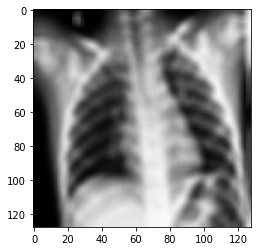

In [ ]:
idx = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[idx])

train_blurred = []
for img in X_train:
    train_blurred.append(cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT))
X_train = np.array(train_blurred)
    
test_blurred = []
for img in X_test:
    test_blurred.append(cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT))
print(idx)

249


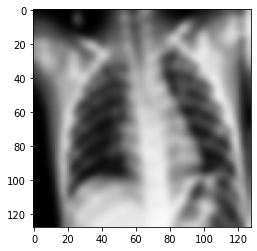

In [ ]:
#visualizing data after gaussian blurring
plt.imshow(X_train[idx])
X_test = np.array(test_blurred)
print(idx)

Step 4. Make data compatible:

a. Reshape data into shapes compatible with Keras models.

b. Convert labels to one hot vectors.

In [ ]:
# Step B - Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y_train = enc.fit_transform(Y_train).toarray()
Y_test = enc.transform(Y_test).toarray()

# Step A
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow(X_train, Y_train, batch_size=16)
test_data = train_datagen.flow(X_test, Y_test, batch_size=8)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(251, 128, 128, 3)
(66, 128, 128, 3)
(251, 3)
(66, 3)


Step 5. Building CNN:

a. Define layers.

b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)


In [ ]:
#Step A

# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

# Step B
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

Step 6. Fit and evaluate model and print confusion matrix.

In [ ]:
#Fitting Model
es = ModelCheckpoint('./classifier.h5', monitor='val_loss', save_best_only=True)

history = classifier.fit_generator(train_data, steps_per_epoch=15, epochs=20, callbacks=[es],
                         validation_data=test_data,  validation_steps=8)

Epoch 1/20
15/15 [==============================] - 4s 287ms/step - loss: 0.1833 - accuracy: 0.9447 - val_loss: 0.3265 - val_accuracy: 0.8906
Epoch 2/20
15/15 [==============================] - 4s 280ms/step - loss: 0.1685 - accuracy: 0.9404 - val_loss: 0.3726 - val_accuracy: 0.9062
Epoch 3/20
15/15 [==============================] - 4s 279ms/step - loss: 0.1736 - accuracy: 0.9277 - val_loss: 0.3596 - val_accuracy: 0.8750
Epoch 4/20
15/15 [==============================] - 4s 280ms/step - loss: 0.1787 - accuracy: 0.9191 - val_loss: 0.6209 - val_accuracy: 0.9062
Epoch 5/20
15/15 [==============================] - 4s 281ms/step - loss: 0.1619 - accuracy: 0.9319 - val_loss: 0.4024 - val_accuracy: 0.9219
Epoch 6/20
15/15 [==============================] - 4s 288ms/step - loss: 0.1725 - accuracy: 0.9404 - val_loss: 0.2130 - val_accuracy: 0.9062
Epoch 7/20
15/15 [==============================] - 4s 283ms/step - loss: 0.1281 - accuracy: 0.9532 - val_loss: 0.2499 - val_accuracy: 0.9219
Epoch 

In [ ]:
print('Evaluating Model')
acc = classifier.evaluate_generator(test_data)
print('Accuracy on test set: '+str(acc[1]))
predictions = classifier.predict_generator(test_data)
Y_pred = []
Y_true = []
for idx, pred in enumerate(predictions):
    Y_pred.append(np.argmax(pred))
    Y_true.append(np.argmax(Y_test[idx]))
from sklearn.metrics import confusion_matrix
cm_n = confusion_matrix(Y_true, Y_pred, normalize='true')
print(cm_n)

# Suppress warnings
warnings.filterwarnings('ignore')

Evaluating Model
Accuracy on test set: 0.8939393758773804
[[0.26923077 0.38461538 0.34615385]
 [0.5        0.25       0.25      ]
 [0.5        0.35       0.15      ]]


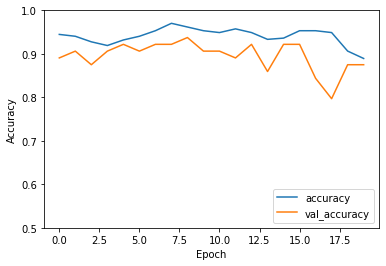

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

Step 7. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
real = []
predicted = []
for img_idx in [2, 3, 33, 36, 59]:
    test_image = X_test[img_idx]
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    labels = list(enc.categories_[0])
    real.append(labels[np.argmax(Y_test[img_idx])])
    predicted.append(labels[np.argmax(result)])
print([2, 3, 33, 36, 59])
print(real)
print(predicted)

[2, 3, 33, 36, 59]
['Viral Pneumonia', 'Viral Pneumonia', 'Covid', 'Covid', 'Normal']
['Viral Pneumonia', 'Normal', 'Covid', 'Covid', 'Normal']
